# Car price preditor
Create a linear regression model to predict the price of a car given a set of features


### Data preparation

In [152]:
import pandas as pd
import numpy as np

In [153]:
data = '..\data\car_data.csv'
df = pd.read_csv(data)
df.head()
# manufacturer suggested retail price (MSRP) to predict 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [154]:
df.columns = df.columns.str.lower().str.replace(' ','_') 

In [155]:
 
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### Exporatory Analysis

In [156]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [158]:
#sns.histplot(df.msrp, bins=50) # long tail distribution

<Axes: xlabel='msrp', ylabel='Count'>

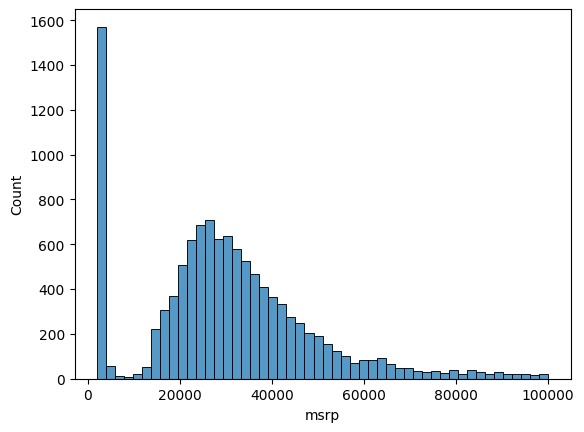

In [159]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50) # zooming into the relevant area

<Axes: xlabel='msrp', ylabel='Count'>

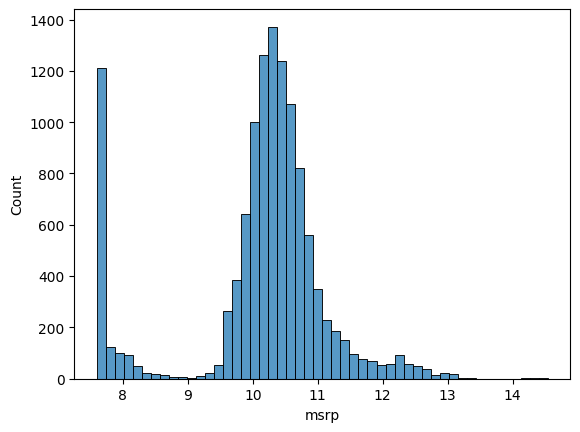

In [160]:
# appliying the logarithm will get rid of long tail problem
# np.log1p adds a one to the varibale before taking logarithm
price_logs=np.log1p(df.msrp)
sns.histplot(price_logs, bins=50)

In [161]:
# missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Validation split

validation split

In [162]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [163]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [164]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train = df.iloc[idx[n_val+n_test:]]

In [165]:
print(len(df_val) + len(df_test) + len(df_train) == n)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

True


In [166]:
y_train = np.log1p(df_train.msrp)
y_test = np.log1p(df_test.msrp)
y_val = np.log1p(df_val.msrp)

In [167]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

### Linear Regression

In [168]:
df_train.iloc[10] 

make                        chevrolet
model                 trailblazer_ext
year                             2004
engine_fuel_type     regular_unleaded
engine_hp                       275.0
engine_cylinders                  6.0
transmission_type           automatic
driven_wheels        rear_wheel_drive
number_of_doors                   4.0
market_category                   NaN
vehicle_size                    large
vehicle_style                 4dr_suv
highway_mpg                        18
city_mpg                           13
popularity                       1385
Name: 10, dtype: object

In [169]:
#X_train
#np.ones(n)]

In [170]:
def train_lin_regression(X, y):
    n = X.shape[0]
    X = np.column_stack([np.ones(n), X])

    XT = X.transpose()
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(XT).dot(y)
    return w[0], w[1:]

In [171]:
df_train.columns
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] # get numerical columns
X_train = df_train[base].fillna(0).values
w0, w = train_lin_regression(X_train,y_train)

In [172]:
w0, w

(7.963556475096341,
 array([ 9.20710435e-03, -1.38559726e-01,  1.61265908e-02,  1.22881992e-02,
        -1.11571602e-05]))

In [173]:
y_pred = w0 + X_train.dot(w)

<Axes: xlabel='msrp', ylabel='Count'>

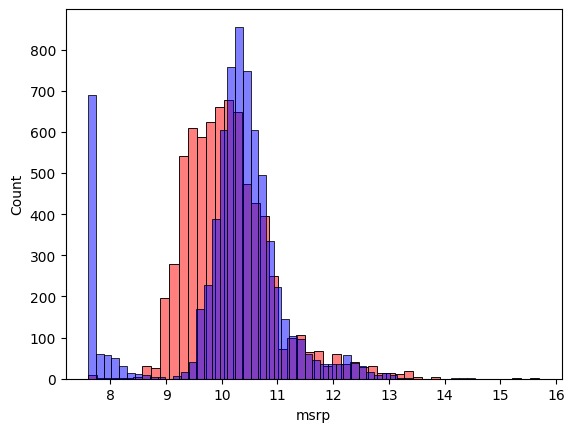

In [174]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins=50)
sns.histplot(y_train, color='blue', alpha = 0.5, bins=50)

### Model Evaluation with RMSE (Root mean squared error)

A way to measure how good the model is. $g(x_i)= \hat{y}_i$ the prediction and $y_i$ is the ground truth.
``` math 
RMSE = \sqrt{\frac{1}{N}\sum_i( g(x_i) -y_i )^2}
```

In [175]:
def rmse(y, y_p):
    return np.sqrt(((y-y_p)**2).mean())
def prepare_X(df):
    return df[base].fillna(0).values
    

In [176]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.7419381478118969

### Feature engineering

In [177]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    #print(type(features))# = features.append('ye')
    return df[features].fillna(0).values


In [178]:
X_train = prepare_X(df_train)
w0, w = train_lin_regression(X_train,y_train)
X_train

array([[1.620e+02, 4.000e+00, 2.600e+01, 1.900e+01, 1.720e+03, 9.000e+00],
       [1.750e+02, 4.000e+00, 3.600e+01, 2.600e+01, 6.400e+02, 1.000e+00],
       [1.320e+02, 4.000e+00, 3.500e+01, 2.700e+01, 1.439e+03, 1.000e+00],
       ...,
       [2.500e+02, 6.000e+00, 2.200e+01, 1.500e+01, 1.851e+03, 1.100e+01],
       [1.740e+02, 4.000e+00, 4.200e+01, 3.100e+01, 2.202e+03, 1.000e+00],
       [2.560e+02, 6.000e+00, 2.700e+01, 2.000e+01, 6.400e+02, 2.000e+00]])

In [179]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5222394405268986

<Axes: xlabel='msrp', ylabel='Count'>

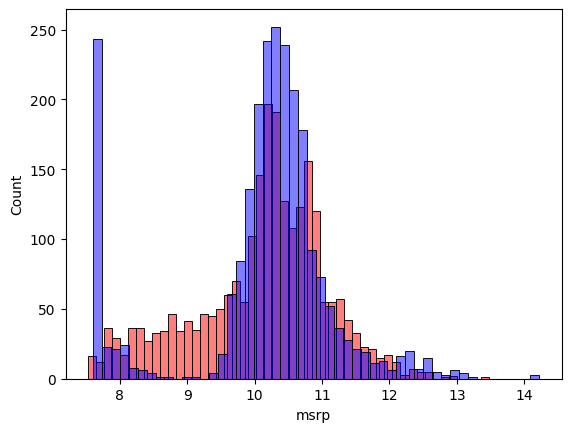

In [180]:
sns.histplot(y_pred, color='red', alpha = 0.5, bins=50)
sns.histplot(y_val, color='blue', alpha = 0.5, bins=50)

Categorical variables
We use one hot encoding a categorical column is represented with multiple binary columns. 

In [181]:
for v in [2,3,4]:
    df_train['num_doors_%s' % v] = (df_train.number_of_doors == v).astype('int')

In [182]:
makes = list(df.make.value_counts().head().index)

In [183]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    return df[features].fillna(0).values

In [184]:
X_train = prepare_X(df_train)
w0, w = train_lin_regression(X_train,y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5100789886278025

### More categorical features

Let's break our code. We use more variables to make a prediction, but they could be linearly dependent

In [185]:
engine = 'engine_fuel_type'
top5 = df[engine].value_counts().head().values
print(top5)

[7172 2009 1523  899  154]


In [186]:
categorical_var = ['engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [187]:
categories = {} #{ cat: [] for cat in categories}
for cat in categorical_var:
    top5 = list(df[cat].value_counts().head().index) #.keys())#.values
    #print(list(top5))
    categories[cat] = top5

In [188]:
#a

In [189]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    

    for cat, val in categories.items():
        #print(cat, type(cat))
        for v in val:
            df['%s_%s' % (cat, v)] = (df[cat]==v).astype('int')
            features.append('%s_%s' % (cat, v))

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    return df[features].fillna(0).values

In [190]:
X_train = prepare_X(df_train)
w0, w = train_lin_regression(X_train,y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

3011.5184328114483

In [191]:
w0, w

(3320881695814856.5,
 array([ 1.88392552e+00,  1.14999872e+02,  1.90543050e+01,  2.91197570e+01,
         2.79207245e-02,  3.42733729e+01,  5.00173547e+03,  4.89709525e+03,
         5.14264698e+03,  4.85213597e+03,  6.76373948e+03, -1.18074628e+15,
        -1.18074628e+15, -1.18074628e+15, -1.18074628e+15, -1.18074628e+15,
        -2.14013542e+15, -2.14013542e+15, -2.14013542e+15, -2.14013542e+15,
         1.58725148e+01,  2.07496270e+00,  3.38518454e+00,  1.23955113e+00,
         6.37594547e-01, -9.53710914e+03, -9.53901659e+03, -9.52168304e+03,
        -5.23253992e-02,  5.54593779e-02,  1.74932828e-01,  3.02782777e-01,
        -1.37794157e-01, -6.71673907e-01, -8.28548452e-01, -5.54065307e-01,
        -3.50263708e-02,  2.17859363e-01, -1.16577569e-02, -8.54982945e-02,
        -9.12651174e-02]))

### Regularization

When there are linear dependent columns or rows in $X$, then $X^{T}X$ has no inverse. 
Due to small errors, the data is almost linearly dependent except for a small $\Delta e$ the inverse is found but the numbers are huge, because it tries to solve this  equation.

Adding a small number $\alpha$ to the diagonal, reduces the likelihood of having linear dependent columns

In [47]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

X= np.array(X)

In [52]:
XTX = X.T.dot(X)-100

In [53]:
y = [1, 2, 3, 1, 2, 3]

In [54]:
len(XTX)

3

In [55]:
XTX = XTX + 0.0001 * np.identity(len(XTX))

In [57]:

np.linalg.inv(XTX)

array([[ 4.02006906e-02, -2.76378021e-02, -2.76378021e-02],
       [-2.76378021e-02,  5.00005025e+03, -4.99994975e+03],
       [-2.76378021e-02, -4.99994975e+03,  5.00005025e+03]])

In [111]:
def train_lin_regression_reg(X, y, r =0.001):
    n = X.shape[0]
    X = np.column_stack([np.ones(n), X])

    XT = X.transpose()
    XTX = XT.dot(X) 
    XTX = XTX + r * np.identity(len(XTX)) ## added regularization term
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(XT).dot(y)
    return w[0], w[1:]

In [108]:
X_train = prepare_X(df_train)
w0, w = train_lin_regression_reg(X_train,y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.46871561054635935

### Fine tuning

In [192]:
def train_lin_regression_reg(X, y, r =0.001):
    n = X.shape[0]
    X = np.column_stack([np.ones(n), X])

    XT = X.transpose()
    XTX = XT.dot(X) 
    XTX = XTX + r * np.identity(len(XTX)) ## added regularization term
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(XT).dot(y)
    return w[0], w[1:]

In [194]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in [10, 1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
    w0, w = train_lin_regression_reg(X_train,y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)
    print(r, w0, score)


10 4.232200708787941 0.48175491491854694
1 5.454208407534937 0.4701357829160464
0 3320881695814856.5 3011.5184328114483
0.1 6.152066557587593 0.4687526504033213
0.01 6.293123273467436 0.46871561054635935
0.001 6.308455042968428 0.46871686322965334
0.0001 6.245706951104356 0.46871704959079546
1e-05 12.270604986189678 0.4687170922628453
1e-06 -426.57235437662456 0.4687169851598408


In [195]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
#for r in [10, 1, 0, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]:
w0, w = train_lin_regression_reg(X_train,y_train, r=0.001)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
print(r, w0, score)

1e-06 6.308455042968428 0.46871686322965334


Train fully on train and val set

In [196]:
df_full_train = pd.concat([df_train, df_val])

In [197]:
df_full_train = df_full_train.reset_index(drop=True)

In [198]:
X_full_train = prepare_X(df_full_train)

In [199]:
X_full_train

array([[162.,   4.,  26., ...,   0.,   0.,   0.],
       [175.,   4.,  36., ...,   0.,   0.,   0.],
       [132.,   4.,  35., ...,   0.,   0.,   0.],
       ...,
       [197.,   4.,  32., ...,   0.,   0.,   0.],
       [302.,   6.,  28., ...,   0.,   0.,   0.],
       [210.,   6.,  20., ...,   0.,   0.,   1.]])

In [200]:
y_full_train = np.concatenate([y_train, y_val])

In [202]:
w0, w = train_lin_regression_reg(X_full_train,y_full_train, r=0.001)


In [203]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
print(score)

0.4642458059171821


In [252]:
num = 290

In [253]:
car = df_test.iloc[num].to_dict()
df_small = pd.DataFrame([car])
X_small = prepare_X(df_small)

In [254]:
y_pred = w0 + X_small.dot(w)
price_pred = np.expm1(y_pred[0])
price_gt = np.expm1(y_test[num])
print( price_pred, price_gt, round((price_pred - price_gt)/price_gt*100), '%')

44285.118308599915 31465.000000000022 41 %
